# Netflix Data Analysis Project

This project explores Netflix's catalog of movies and TV shows to uncover trends in content types, growth, genres, countries, and key contributors.


In [25]:
import pandas as pd

## 1. Load Data into DataFrame

In [17]:
# Load the Netflix dataset
df = pd.read_csv('Data/netflix_titles.csv')

# Show the first 5 rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 2. Check Dataset Info

In [18]:
# Print the shape of the dataset (number of rows and columns)
print("Shape of dataset:", df.shape)

# Print the column names to understand what data fields we have
print("\nColumn names:")
print(df.columns)

# Check for missing values in each column
# This helps us identify which columns have incomplete data
print("\nMissing values in each column:")
print(df.isnull().sum())


Shape of dataset: (8807, 12)

Column names:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Missing values in each column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


## 3. Understand Data Types and Clean Up a Bit

In [19]:
# First, remove leading/trailing spaces from all date entries
df['date_added'] = df['date_added'].str.strip()

# Then, convert to datetime
# If conversion fails, it will turn that value into NaT (Not a Time)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Check if it worked
df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 4. First Real Analysis – Movies vs TV Shows  
**Question:** How many Movies and TV Shows are on Netflix?  
**Why this matters:** It tells us what kind of content dominates Netflix.

Number of Movies and TV Shows:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


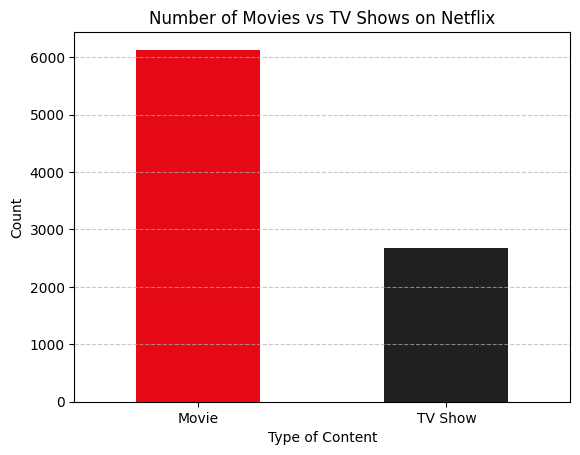

In [20]:
# Count how many titles are 'Movie' vs 'TV Show' in the 'type' column
content_type_counts = df['type'].value_counts()

# Show the result
print("Number of Movies and TV Shows:")
print(content_type_counts)

# Plot it as a bar chart
import matplotlib.pyplot as plt

# Make the chart
content_type_counts.plot(kind='bar', color=['#E50914', '#221f1f'])

# Add labels and title
plt.title("Number of Movies vs TV Shows on Netflix")
plt.xlabel("Type of Content")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Keep labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.show()


## 5. Netflix Growth Over the Years 📈  
**Question:** How has the amount of content on Netflix changed over time?  
**Insights:** Shows Netflix’s expansion strategy and when it added most content.

Number of titles added each year:
year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      24
2015.0      82
2016.0     429
2017.0    1188
2018.0    1649
2019.0    2016
2020.0    1879
2021.0    1498
Name: count, dtype: int64


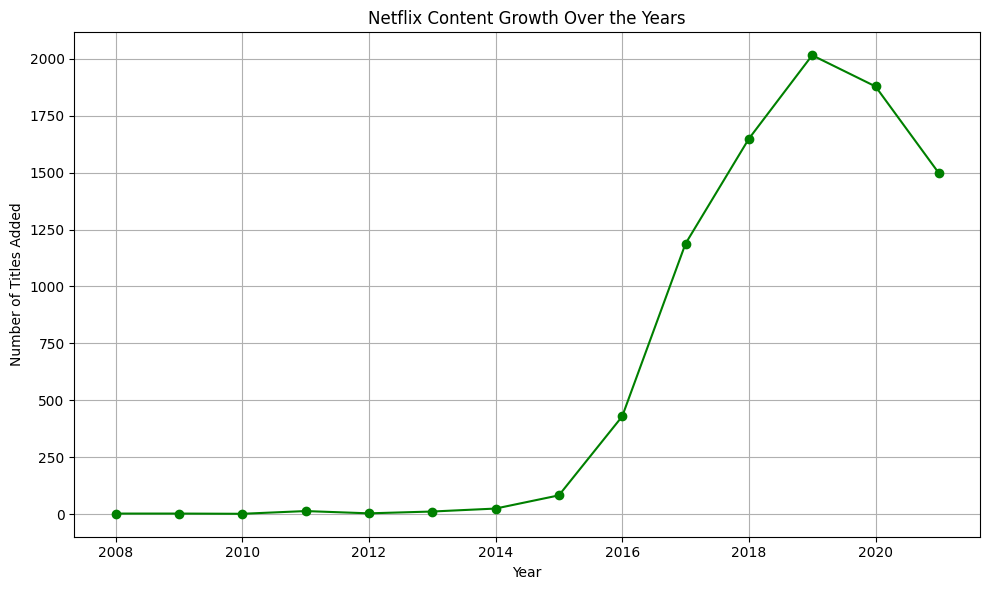

In [21]:
# Create a new column called 'year_added' from the 'date_added' column
# We extract just the year (e.g., 2017, 2018...)
df['year_added'] = df['date_added'].dt.year

# Drop rows where 'year_added' is missing
df_years = df.dropna(subset=['year_added'])

# Count how many titles were added each year
titles_per_year = df_years['year_added'].value_counts().sort_index()

# Print the counts
print("Number of titles added each year:")
print(titles_per_year)

# Plot the growth trend
plt.figure(figsize=(10, 6))
titles_per_year.plot(kind='line', marker='o', color='green')

# Add labels and title
plt.title("Netflix Content Growth Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


## 6. Top Countries Producing Netflix Content 🌍  
**What we’ll learn:** Which countries Netflix sources the most content from, and if it’s global or focused.

Top 10 countries with the most Netflix titles:
main_country
United States     3211
India             1008
United Kingdom     628
Canada             271
Japan              259
France             212
South Korea        211
Spain              181
Mexico             134
Australia          117
Name: count, dtype: int64


C:\Users\iamth\AppData\Local\Temp\ipykernel_26688\3989618534.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['main_country'] = df_country['country'].apply(lambda x: x.split(',')[0].strip())


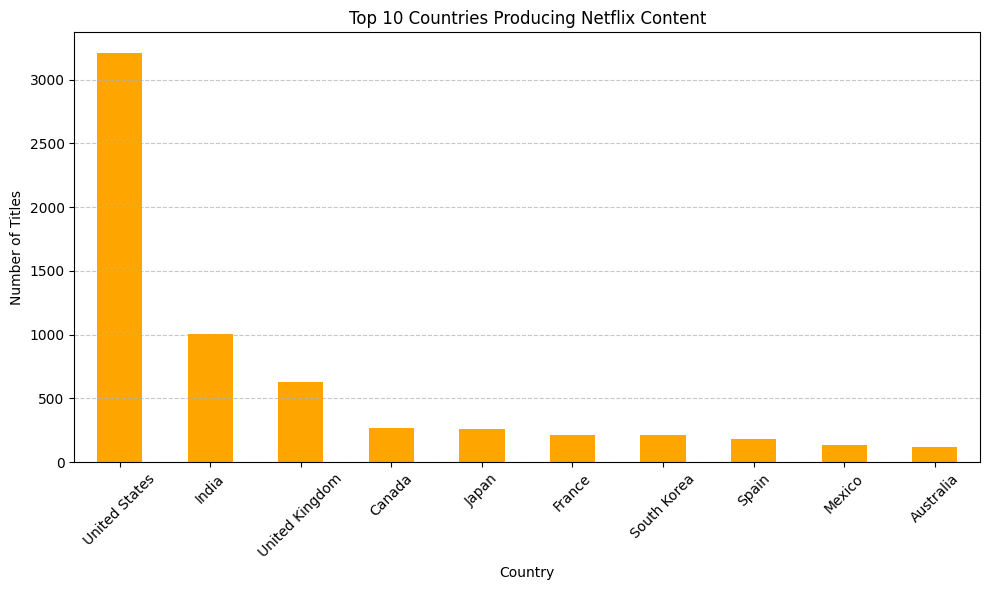

In [22]:
# Count the number of titles per country
# Drop missing values first to avoid errors
df_country = df.dropna(subset=['country'])

# Some titles have multiple countries, separated by commas — we'll only count the first one
df_country['main_country'] = df_country['country'].apply(lambda x: x.split(',')[0].strip())

# Count the number of titles by main country
top_countries = df_country['main_country'].value_counts().head(10)

# Print the result
print("Top 10 countries with the most Netflix titles:")
print(top_countries)

# Plot it
plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='orange')
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 7. Analyze Top Genres (Most Popular Categories)  
**Why:** To understand the types of content Netflix focuses on — Drama, Comedy, Horror, etc.

Top 10 Netflix Genres:
genres_list
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


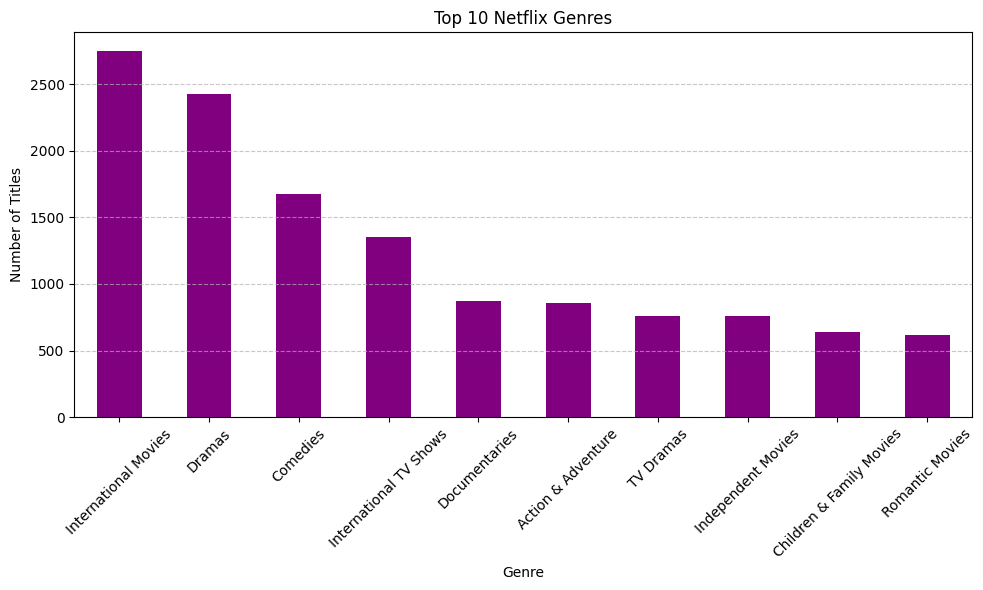

In [23]:
# 'listed_in' column has genres separated by commas
# We want to count each genre separately

# Step 1: Drop rows with missing genres
df_genres = df.dropna(subset=['listed_in'])

# Step 2: Split the genres into lists
df_genres['genres_list'] = df_genres['listed_in'].apply(lambda x: [g.strip() for g in x.split(',')])

# Step 3: Explode the list so each genre has its own row
genres_exploded = df_genres.explode('genres_list')

# Step 4: Count the occurrences of each genre
genre_counts = genres_exploded['genres_list'].value_counts().head(10)

# Step 5: Print the top 10 genres
print("Top 10 Netflix Genres:")
print(genre_counts)

# Step 6: Plot the top 10 genres
plt.figure(figsize=(10,6))
genre_counts.plot(kind='bar', color='purple')
plt.title("Top 10 Netflix Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 8. Analyze Popular Directors or Cast  
**Goal:** Find out who directs or stars in the most Netflix titles.

Top 10 Directors on Netflix:
director_list
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Jay Chapman            12
Youssef Chahine        12
Name: count, dtype: int64


C:\Users\iamth\AppData\Local\Temp\ipykernel_26688\1189502931.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_directors['director_list'] = df_directors['director'].apply(lambda x: [d.strip() for d in x.split(',')])


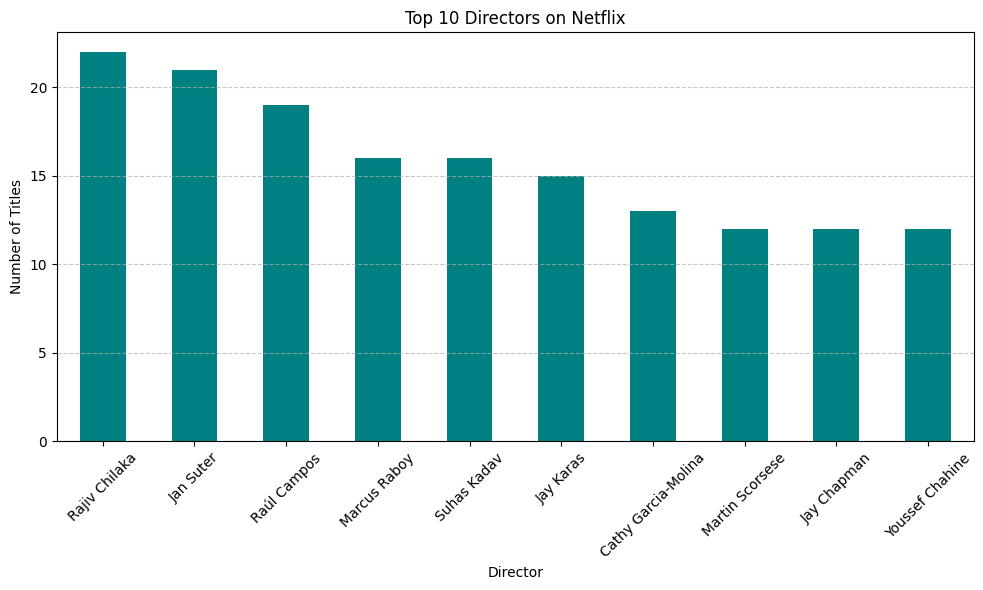

In [24]:
# Drop rows where director info is missing
df_directors = df.dropna(subset=['director'])

# Some titles have multiple directors separated by commas, so split and explode them
df_directors['director_list'] = df_directors['director'].apply(lambda x: [d.strip() for d in x.split(',')])

# Explode so each director has its own row
directors_exploded = df_directors.explode('director_list')

# Count number of titles per director
director_counts = directors_exploded['director_list'].value_counts().head(10)

# Print top 10 directors
print("Top 10 Directors on Netflix:")
print(director_counts)

# Plot it
plt.figure(figsize=(10,6))
director_counts.plot(kind='bar', color='teal')
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Director")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Conclusion

Summarize the key findings here, for example:

- Netflix mainly hosts movies over TV shows.  
- Rapid growth in content starting around 2015.  
- USA and India lead in content production.  
- Drama and International genres dominate the platform.  
- Certain directors have been very prolific.
